<a href="https://colab.research.google.com/github/AnshBansal01/DeepLearning/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# LOAD YOLO


In [3]:
print("LOADING YOLO")
net =cv2.dnn.readNet("/content/drive/MyDrive/Deep Learning/yolov3.weights","/content/drive/MyDrive/Deep Learning/yolov3.cfg")

LOADING YOLO


# Load COCO


In [4]:
classes = []
with open("/content/drive/MyDrive/Deep Learning/coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]

In [7]:
layer_names =net.getLayerNames()

In [8]:
output_layers = [layer_names[i- 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

YOLO LOADED


Input Image:


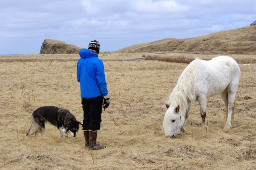

In [9]:
img = cv2.imread("/content/drive/MyDrive/Deep Learning/person.jpg")
img = cv2.resize(img, None,fx=0.4, fy=0.4)
height, width, channels =img.shape
print("Input Image:")
cv2_imshow(img)

In [10]:
blob =cv2.dnn.blobFromImage(img, 1 /255.0, (416, 416),swapRB=True,crop=False)

In [11]:
net.setInput(blob)
outs =net.forward(output_layers)

In [12]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.3:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [13]:
indexes =cv2.dnn.NMSBoxes(boxes,confidences, 0.5, 0.4)

In [14]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]

        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Draw the label
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Print the detected object information
        print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x}, {y}, {w}, {h}")

Detected object: horse, confidence: 0.9975360631942749, box: 159, 53, 84, 83
Detected object: dog, confidence: 0.9832477569580078, box: 24, 104, 58, 35
Detected object: person, confidence: 0.9999039173126221, box: 76, 36, 33, 113


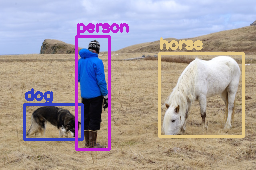

-1

In [15]:
cv2_imshow(img)
cv2.waitKey(0)